In [11]:
import numpy as np
from sympy.utilities.iterables import multiset_permutations
import matplotlib.pyplot as plt
from tqdm import tqdm

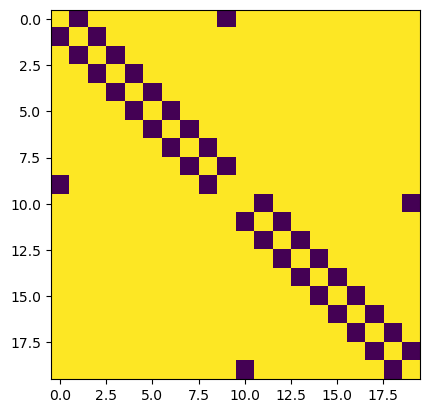

In [14]:
Ns = 10; # number of single-particle states
Ns = 2 * Ns # adjust for spin
Np = 2 # number of fermionic particles

def q(N1, k):
    return np.sum(N1[:k])
def one_el(N1,N2,r,s):
    N1_1 = np.delete(N1, np.array([r,s]))
    N2_1 = np.delete(N2, np.array([r,s]))
    delta = np.all(N1_1 == N2_1)
    dr = 0
    ds = 0
    if r != s:
        if N1[r]-1 == N2[r] :
            dr = 1
        if N1[s] == N2[s]-1 :
            ds = 1
    if r == s:
        if N1[r] == N2[s]:
            dr = 1
            ds = 1
    #print(delta, dr, ds)
    return (N1[r]*((-1)**q(N1,r)))*(N2[s]*((-1)**q(N2,s)))*delta*dr*ds
def two_el(N1, N2, r, s, t, v):
    sig_v = N2[v]*(-1)**q(N2,v)
    N2[v]-=1
    if sig_v != 0:
        sig_t = N2[t]*(-1)**q(N2,t) * sig_v
        N2[t]-=1
        if sig_t != 0:
            sig_s = (1-N2[s])*(-1)**q(N2,s) * sig_t
            N2[s] += 1
            if sig_s != 0:
                sig_r = (1-N2[r])*(-1)**q(N2,r) * sig_s
                N2[r] += 1
                if sig_r != 0 and np.all(N1 == N2):
                    return sig_r
    return 0
    
    if np.any(N2 < 0):
        return 0
    if np.any(N2 > 1):
        return 0
    if np.all(N1 == N2):
        return 1
    else:
        return 0
    
U = 1;
def hub_U(r,s,t,v): # spin off-diagonal, site-diagonal
    if len(n.unique(np.array([r,s,t,v])))==1:
        return U
    else:
        return 0
    



def one_el_NN(r,s):
    if r == s + 1:
        return -1
    if r == s - 1:
        return -1
    if s == r + 1:
        return -1
    if s == r - 1:
        return -1
    if s + Ns/2 == r+1:
        return -1
    if r + Ns/2 == s+1:
        return -1
    return 0
NN_mat = np.zeros((Ns,Ns))
for r in range(Ns):
    for s in range(Ns):
        if r < Ns/2 and s < Ns/2: # spin up spin up
            r1 = r;
            s1 = s;
            NN_mat[r,s] = one_el_NN(r1,s1)
        if r >= Ns/2 and s >= Ns/2: # spin down spin down
            r1 = r-Ns/2;
            s1 = s-Ns/2;
            NN_mat[r,s] = one_el_NN(r1,s1)
        if r < Ns/2 and s >= Ns/2: # spin up spin down
            r1 = r;
            s1 = s-Ns/2;
            NN_mat[r,s] = one_el_NN(r1,s1)*0
        if r >= Ns/2 and s < Ns/2: # spin down spin up
            r1 = r-Ns/2;
            s1 = s;
            NN_mat[r,s] = one_el_NN(r1,s1)*0
            
            
            
U_mat = np.zeros((Ns, Ns, Ns, Ns))

    
Nr_mat_list = np.zeros((Ns,Ns,Ns),dtype=int)
for n in range(Ns):
    Nr_mat_list[n,n,n] = 1
plt.imshow(NN_mat)
plt.show()

In [4]:
def S(Np, Ns):
    S0 = np.zeros(Ns,dtype=int)
    S0[:Np] = 1
    return np.array(list(multiset_permutations(S0)))
basis = S(Np,Ns)
print(len(basis))

6


In [5]:
np.delete(np.arange(Ns),3)

array([0, 1, 2])

In [6]:
# generate nonzero elements of the one-particle
# all particles different
import itertools
# case 0 two indices are the same
def two_el_op(N1, N2, mat):
    # mat[j,k,l,m]
    out = 0
    case_0_delta = np.all(N1 == N2)
    ran = np.arange(Ns)
    if case_0_delta:
        for r in range(Ns):
            for s in range(Ns):
                out += (1/2)*N1[r]*N1[s]*(mat[r,s,r,s] - mat[r,s,s,r])
    if not(case_0_delta):
        for r in range(Ns):
            if N1[r] == N2[r]:
                for s in np.delete(ran,r):
                    for t in np.delete(ran,r):
                        out += (-1)**(q(N1,s)+q(N2,t)) * (1-N2[s])*N2[t])
                
        

SyntaxError: unmatched ')' (3796683000.py, line 19)

[-2.  0.  0.  0.  0.]
Ground state:  [1 1 0 0]
Ground state:  [0 1 0 1]
Ground state:  [0 1 1 0]


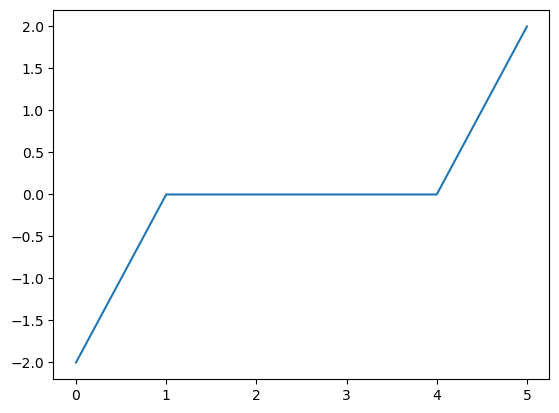

In [7]:
H_1 = NN_mat;
E_1, U_1 = np.linalg.eigh(H_1) # diagonalize the 1 electron Hamiltonian

# construct the eigenenergies for the N-electron states
E_N = np.array([np.sum(basis[n]*E_1) for n in range(len(basis))])
idx = np.argsort(E_N)
E_N = E_N[idx]
print(E_N[:5])
basis_N = basis[idx]
print('Ground state: ', basis_N[0])
print('Ground state: ', basis_N[1])
print('Ground state: ', basis_N[2])
plt.plot(E_N)
plt.show()

In [8]:
def one_el_op(op_mat):
    one_el_mat = np.zeros((len(basis),len(basis)),dtype=complex)
    op_mat_pos = np.where(op_mat != 0.0)
    ran = np.arange(len(basis))
    for n in tqdm(range(len(basis))):
        for m in ran[n:]:
            for pos_n in range(len(op_mat_pos[1])):
                r = op_mat_pos[0][pos_n]
                s = op_mat_pos[1][pos_n]
                one_el_mat[n,m] += one_el(basis[n],basis[m],r,s)*op_mat[r,s]
            one_el_mat[m,n] = np.conjugate(one_el_mat[n,m])
    return one_el_mat

NN_CI_mat = one_el_op(NN_mat)
Nr_CI_mat_list = np.zeros((Ns,len(basis),len(basis)),dtype=complex)
for n in range(Ns):
    Nr_CI_mat_list[n] = one_el_op(Nr_mat_list[n])

100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 8275.51it/s]


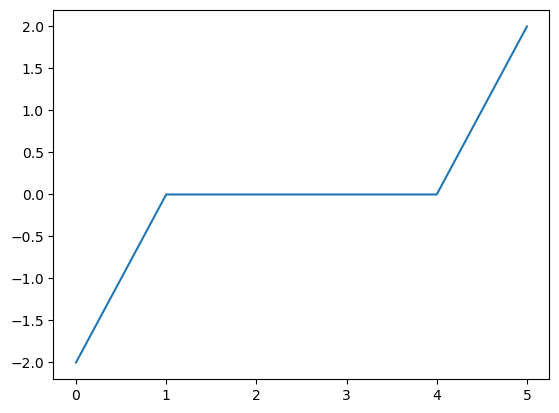

In [9]:
evals, evecs = np.linalg.eigh(np.real(NN_CI_mat))
plt.plot(evals)
plt.show()

NameError: name 'fft_mat' is not defined

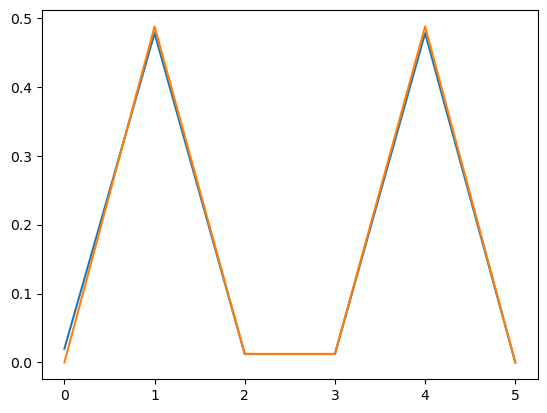

In [10]:
r=3
plt.plot(np.abs(np.cos(r)*evecs[:,1] + np.sin(r)*evecs[:,2])**2)
plt.plot(np.abs(evecs[:,1] + 0*evecs[:,2])**2)
plt.plot(np.abs(fft_mat[:,1])**2)


[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]
0.9999999999999998


/tmp/ipykernel_1812464/596448151.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  site_pop[n] = np.dot(np.conjugate(evecs[:,m]),np.matmul(Nr_CI_mat_list[n], evecs[:,m]))


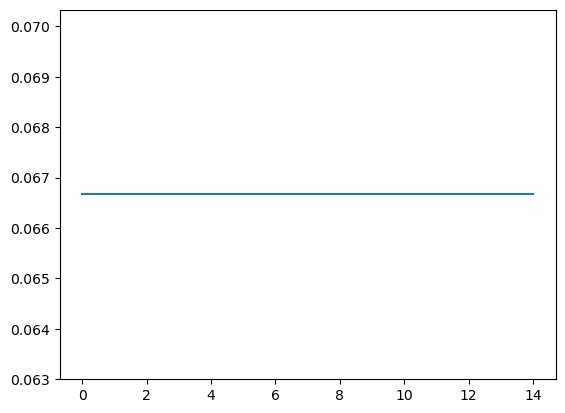

In [483]:
site_pop = np.zeros((Ns))
m=0
for n in range(Ns):
    site_pop[n] = np.dot(np.conjugate(evecs[:,m]),np.matmul(Nr_CI_mat_list[n], evecs[:,m]))
    #for b in range(len(basis)):
    #    site_pop[n] += np.abs(evecs[b,m])**2 * basis[b,n]
print(site_pop)
print(np.sum(site_pop))
plt.plot(site_pop)
plt.show()

## 